# Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import math
import matplotlib as mpl
from sklearn.metrics import mean_squared_error

### Read Dataset

In [3]:
dataset = pd.read_csv('ASIANPAINT.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [4]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4.977000e+03,4.977000e+03,2126.000000,4.468000e+03,4468.000000
mean,1194.812497,1195.285282,1211.490396,1179.330038,1194.996474,1195.125537,1195.495069,3.868855e+05,4.219766e+13,32440.173565,2.343225e+05,0.646205
std,1085.533602,1084.934153,1098.298681,1073.615274,1085.472645,1085.546077,1086.154783,6.488019e+05,7.209965e+13,24965.482747,3.602363e+05,0.175389
min,210.750000,210.000000,215.750000,204.000000,210.600000,210.750000,212.220000,2.500000e+01,1.278415e+09,70.000000,2.500000e+01,0.134700
25%,400.150000,400.000000,405.000000,393.500000,400.050000,400.300000,399.970000,1.256400e+04,6.799310e+11,13839.000000,1.148300e+04,0.514275
50%,856.250000,860.000000,867.800000,846.050000,856.400000,856.600000,856.360000,4.838800e+04,6.790388e+12,28222.500000,4.185350e+04,0.634450
75%,1365.650000,1367.950000,1386.000000,1351.450000,1365.000000,1366.000000,1367.260000,6.665330e+05,6.076701e+13,44032.750000,3.698942e+05,0.778025
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.100000,5213.100000,5175.790000,8.272850e+06,1.075676e+15,283034.000000,4.111610e+06,1.000000


In [5]:
dataset.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2851
Deliverable Volume     509
%Deliverble            509
dtype: int64

### Mengambil kolom tertentu saja pada dataset

In [6]:
df = dataset[[ 'Prev Close', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume']].copy()

In [7]:
df.head()

,Prev Close,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,
2000-01-03,361.20,390.0,370.0,385.0,381.65,380.54,3318
2000-01-04,381.65,392.0,375.0,390.0,385.55,383.50,4818
2000-01-05,385.55,390.0,371.5,383.0,383.00,379.81,2628
2000-01-06,383.00,384.9,374.5,375.1,377.50,379.88,3354
2000-01-07,377.50,390.0,370.0,389.0,385.70,383.38,9589


# Data Preprocessing

### Reshape Data menjadi Array 2D

In [8]:
df.shape

(4977, 7)

In [9]:
# Mengambil kolom VWAP dan mengubahnya menjadi array 2D
df_2d = df['VWAP'].values.reshape(4977,1)
print(df_2d.shape)
print(df_2d)

(4977, 1)
[[ 380.54]
 [ 383.5 ]
 [ 379.81]
 ...
 [1813.92]
 [1805.35]
 [1790.83]]


### Scaling Data

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
df_2d = scaler.fit_transform(df_2d)

### Splitting Train dan Test Set

In [11]:
train_size = int(len(df_2d) * 0.7)
test_size = len(df_2d) - train_size
train, test = df_2d[0:train_size,:], df_2d[train_size:len(df_2d),:]
print(train.shape)
print(test.shape)

(3483, 1)
(1494, 1)


### Membuat Sequence

In [12]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        # print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [13]:
train.shape

(3483, 1)

In [14]:
test.shape

(1494, 1)

In [15]:
seq_size = 100

X_train, y_train = to_sequences(train, seq_size)
X_test, y_test = to_sequences(test, seq_size)

print("Shape of training set: {}".format(X_train.shape))
print("Shape of test set: {}".format(X_test.shape))

Shape of training set: (3382, 100)
Shape of test set: (1393, 100)


### Mengubah Data Train dan Test menjadi 3D

In [16]:
#Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train)
print(X_train.shape)

[[[0.03391108]
  [0.03450742]
  [0.033764  ]
  ...
  [0.04341432]
  [0.04210478]
  [0.0435352 ]]

 [[0.03450742]
  [0.033764  ]
  [0.03377811]
  ...
  [0.04210478]
  [0.0435352 ]
  [0.04257218]]

 [[0.033764  ]
  [0.03377811]
  [0.03448324]
  ...
  [0.0435352 ]
  [0.04257218]
  [0.04387366]]

 ...

 [[0.8971728 ]
  [0.91036492]
  [0.92642392]
  ...
  [0.05926783]
  [0.05888504]
  [0.0590865 ]]

 [[0.91036492]
  [0.92642392]
  [0.9358909 ]
  ...
  [0.05888504]
  [0.0590865 ]
  [0.05952973]]

 [[0.92642392]
  [0.9358909 ]
  [0.92801955]
  ...
  [0.0590865 ]
  [0.05952973]
  [0.05879438]]]
(3382, 100, 1)


# Import Model yang sudah ditraining

In [17]:
from keras.models import load_model

In [18]:
model = load_model('./rnn_model_100seq.h5')

### Memprediksi Model Train dan Test

In [19]:
def plot_predictions(title, test,predicted):
    plt.figure(figsize = (20,10))
    plt.plot(test, color='red',label='Actual')
    plt.plot(predicted, color='blue',label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [20]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [21]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

In [22]:
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score: %.2f RMSE' % (testScore))

Score: 20.34 RMSE


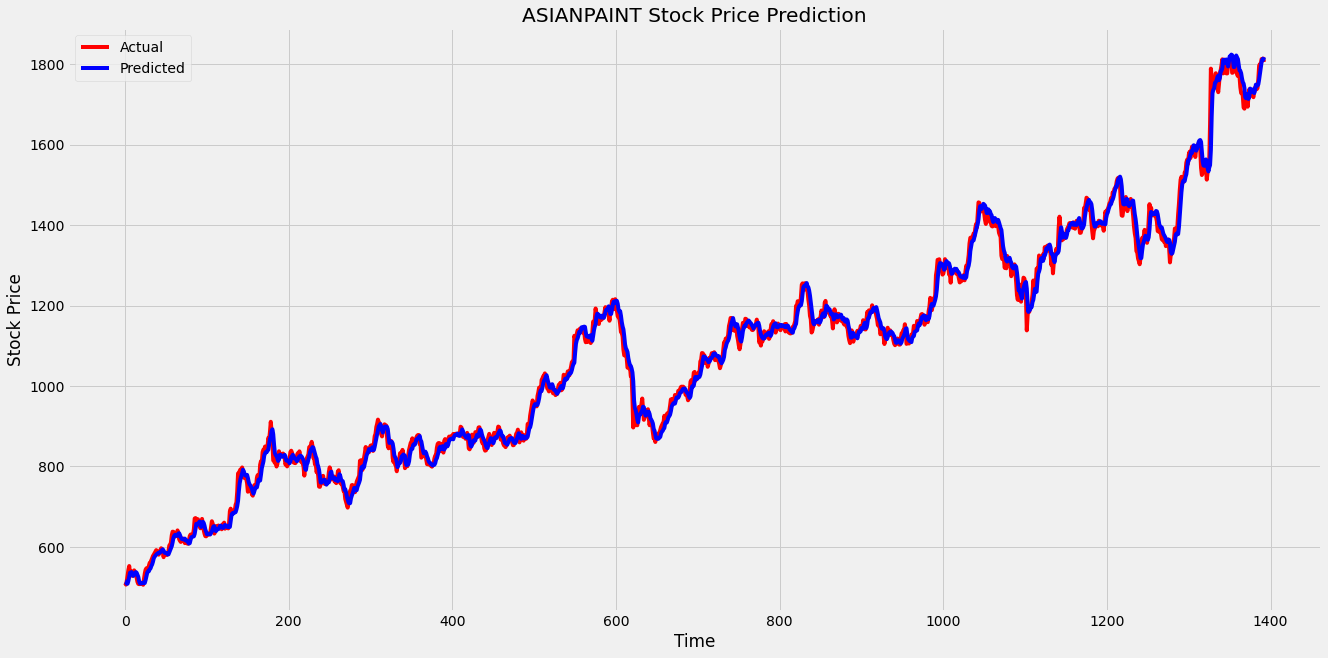

In [23]:
plot_predictions('ASIANPAINT Stock Price Prediction', testY[0], testPredict[:,0])

# Prediksi 5 Tahun Kedepan

In [24]:
len(test)

1494

In [25]:
test.shape

(1494, 1)

### Membuat Sequence 100 hari terakhir

In [26]:
last_day = seq_size

In [27]:
#Getting the last 100 days records
fut_inp = test[len(test)-last_day:]
fut_inp = fut_inp.reshape(1,-1)


In [28]:
tmp_inp = list(fut_inp)

In [29]:
fut_inp.shape

(1, 100)

In [30]:
# Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [31]:
# Hari berikutnya yang akan diprediksi
# 5 tahun

next_b = 5 * 360
print("5 Tahun kedepan : {} hari".format(next_b))

5 Tahun kedepan : 1800 hari


In [32]:
next_day = next_b

In [33]:
#Predicting next 5 Years price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps= last_day
i=0
while(i<next_day):
    
    if(len(tmp_inp)>last_day):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

In [34]:
len(df_2d)

4977

In [35]:
df_2d

array([[0.03391108],
       [0.03450742],
       [0.033764  ],
       ...,
       [0.32269113],
       [0.32096455],
       [0.31803923]])

In [36]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,last_day+1)
plot_pred=np.arange(last_day+1,last_day+1+next_day)

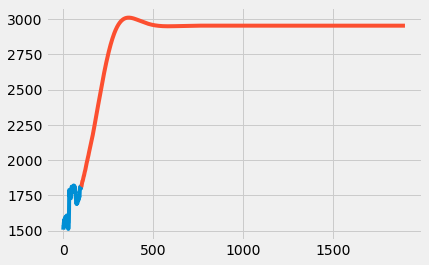

In [37]:
plt.plot(plot_new, scaler.inverse_transform(df_2d[len(df_2d)-last_day:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

In [38]:
future_predict = scaler.inverse_transform(lst_output)
future_predict.shape

(1800, 1)

In [39]:
print("Harga saham pada 5 tahun ke depan ({} hari): {}".format(next_b, future_predict[next_b-1]))

Harga saham pada 5 tahun ke depan (1800 hari): [2951.94785286]


In [40]:
plot_pred1=np.arange(last_day+1,last_day+1+60)

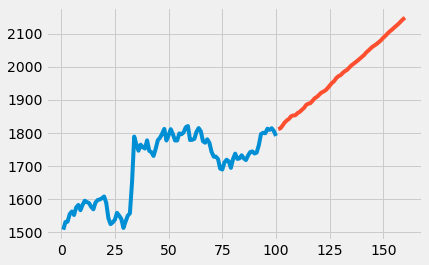

In [41]:
plt.plot(plot_new, scaler.inverse_transform(df_2d[len(df_2d)-last_day:]))
plt.plot(plot_pred1, scaler.inverse_transform(lst_output[:60]))

In [42]:
print("Harga saham pada 30 hari ke depan : {}".format(future_predict[30-1]))
print("Harga saham pada 60 hari ke depan : {}".format(future_predict[60-1]))

Harga saham pada 30 hari ke depan : [1974.0244324]
Harga saham pada 60 hari ke depan : [2147.99048389]


# Final Data

In [43]:
test_new = test.tolist()

In [44]:
len(test_new)

1494

In [45]:
# Join test data dengan predicted future output
test_new.extend(lst_output)

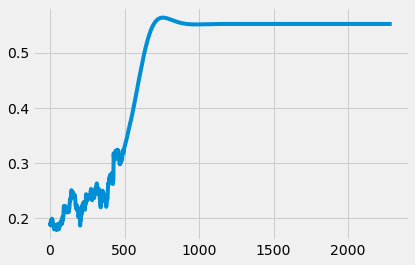

In [46]:

plt.plot(test_new[1000:])

In [47]:
# Membuat graph final
final_graph = scaler.inverse_transform(test_new).tolist()

In [48]:
len(final_graph)

3294

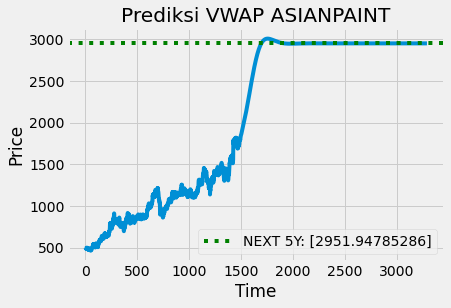

In [49]:
#Plotting final results with predicted value after 5 Years
plt.plot(final_graph)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("Prediksi VWAP ASIANPAINT")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'green', linestyle = 'dotted', label = 'NEXT 5Y: {0}'.format(future_predict[next_b-1]))
plt.legend()